
<img src= "img_murat/bob_ross.jpg" style="height:200px">



# Objectives

- Describe decision tree methods for classification and regression.

- Apply a decision tree regressor with sklearn.

- Define Gini impurity index, Shannon's entropy.

- Compare decision trees with the models we learnt before. 




## Regression Trees 
[dataset](https://www.kaggle.com/floser/hitters/downloads/hitters.zip/1)


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import baseball data and let's name it as hitters
hitters = pd.read_csv('data/Hitters.csv')
hitters.dropna(inplace  = True)
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [5]:
## we simplify the data a little bit for the 
## discussion of the new topic
df_years = hitters.loc[:, ['Years', 'Hits']] 
df_years['salary'] = hitters.Salary.apply(np.log)
# df_years['Years'] = hitters.Years.apply(np.log)
df_years.head()

,Years,Hits,salary
1,14,81,6.163315
2,3,130,6.173786
3,11,141,6.214608
4,2,87,4.516339
5,11,169,6.620073


<img src= "img_murat/hitters_salary2.png" style="height:400px">
<img src= "img_murat/partition_of_set.png" style="height:400px">
[img source: ISLR]

__Your Turn__

- Use sklearn.tree to fit a DecisionTree (Hint: use DecisionTreeRegressor class)

- [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)



In [45]:
import importlib
import sklearn
importlib.reload(sklearn)
from sklearn import tree

estimator = tree.DecisionTreeRegressor(ccp_alpha=.04)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X = df_years[['Years', 'Hits']]
y = df_years[['salary']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# fit the model
estimator.fit(X_train, y_train)
# cross_val_score(regressor, X, y, cv=10)

# print the score
estimator.score(X_train, y_train)

0.6167514214662335

In [46]:
## Use trained estimator for making predictions
estimator.score(X_test, y_test)

0.4129970316453756

### What is happening under the hood? 

- Divide the predictor space $X_1, X_2, \cdots X_k$ into distinct rectangles $R_1, \cdots, R_{k}$

- For every observation that falls into the region $R_j$ , we make the same prediction, which is simply the mean of the response values for the training observations in $R_j$.

__Obvious questions__

- Why we divide rectangular regions?

- How to construct rectangles $R_1, \cdots, R_{j}$'s

__Goal__

Again we try to construct rectangles $R_j$ so that the residual sum of squares is minimum:

<img src= "img_murat/dt_least_square.png" style="height:100px">

__Problem__ with this approach is too complicated to find!! 

__Solution?__ Greedy algorithm!!

Instead of finding best partition, start from one variable and do the best partition.



__Final Algorithm__
 
- Start with a variable and division that gives the greatest possible reduction in RSS

- Continue this approach but only check the RSS in resulting regions.

- Stop with a predetermined stopping criteria.

<img src= "img_murat/Partition_with_5_boxes_ISLR.png" style="height:300px">

<img src= "img_murat/graph_of_partition_with_5_boxes.png" style="height:300px">



### Possible Problems:

- Good for training but not for test --> Can you see why?

- Overfitting is a common thing with decision trees: Solution is __Tree Pruning!__


<img src= "img_murat/pruning.jpg" style="height:250px">


[Let's check sklearn for pruning methods!!](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

For more on Tree pruning read pg: 307 from ISLR


In [47]:
df_sorted = df_years.sort_values(by = 'Hits')
X_sorted = df_sorted[['Years', 'Hits']]
y_pred = estimator.predict(X_sorted)

In [48]:
est_2 = tree.DecisionTreeRegressor(max_depth=2)

est_2.fit(X, y)

y_pred2 = est_2.predict(X_sorted)

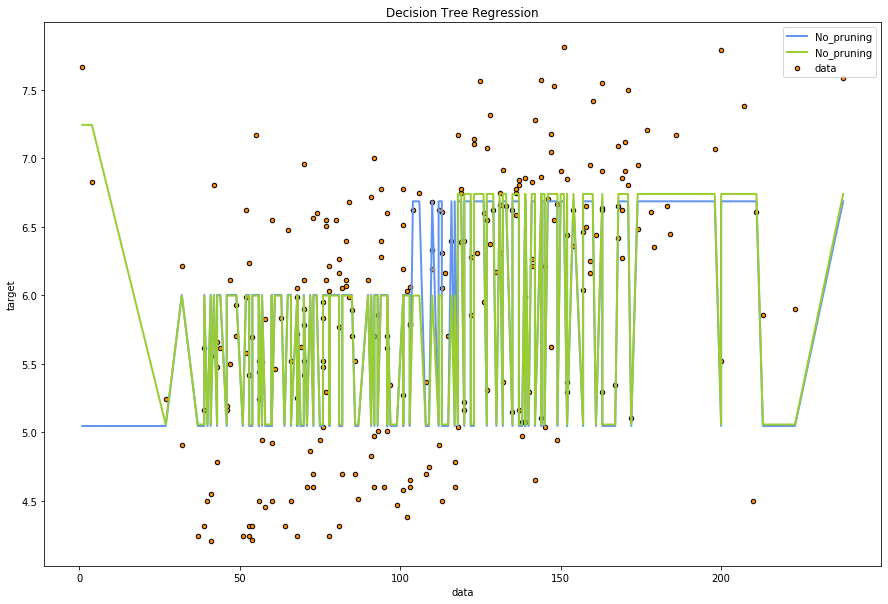

In [49]:
# Plot the results
plt.figure(figsize= (15, 10))
plt.scatter(df_years['Hits'], y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(df_sorted['Hits'], y_pred, color="cornflowerblue",
         label="No_pruning", linewidth=2)

plt.plot(df_sorted['Hits'], y_pred2, color="yellowgreen",
         label="No_pruning", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [51]:
from sklearn.tree import export_text

r = export_text(est_2, feature_names= ['years', 'hits'])
print(r)

|--- years <= 4.50
|   |--- hits <= 15.50
|   |   |--- value: [7.24]
|   |--- hits >  15.50
|   |   |--- value: [5.06]
|--- years >  4.50
|   |--- hits <= 117.50
|   |   |--- value: [6.00]
|   |--- hits >  117.50
|   |   |--- value: [6.74]



In [54]:
import graphviz 
importlib.reload(graphviz)
dot_data = tree.export_graphviz(estimator, out_file=None, 
                     feature_names=['years', 'salary'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("baseball")


'baseball.pdf'

In [69]:
estimator = tree.DecisionTreeRegressor(ccp_alpha=.04)
X = hitters.drop(columns=['Salary','NewLeague','League','Division'])
y = df_years[['salary']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
# fit the model
estimator.fit(X_train, y_train)
# cross_val_score(regressor, X, y, cv=10)

# print the score
estimator.score(X_train, y_train)

0.8026211265039102

In [70]:
estimator.score(X_test, y_test)

0.5668136561649673

In [98]:
alpha = []
best_alphas = []
for run in range(0,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    for i in np.arange(0.004,.05,.001):
        clf = tree.DecisionTreeRegressor(ccp_alpha=i)
        # Perform 7-fold cross validation 
        scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=7, n_jobs=4)
        alpha.append((i,scores.mean()))
    print(f'run {run}: best alpha: ',max(alpha, key=operator.itemgetter(1)))
    max_alpha = max(alpha, key=operator.itemgetter(1))[0]
    best_alphas.append(max_alpha)
    clf = tree.DecisionTreeRegressor(ccp_alpha=max_alpha)
    clf.fit(X_train, y_train)
    print(clf.score(X_train, y_train))
    print(clf.score(X_test, y_test))
print('mean of best alphas',np.mean(best_alphas))

run 0: best alpha:  (0.021, 0.6581215642616598)
0.8086736857042094
0.6994521147761732
run 1: best alpha:  (0.021, 0.6581215642616598)
0.7797796912321036
0.4543643072394949
run 2: best alpha:  (0.021, 0.6581215642616598)
0.8150008266572667
0.6659900682716864
run 3: best alpha:  (0.026, 0.6910618239536566)
0.8096989805993007
0.7022310228948266
run 4: best alpha:  (0.026, 0.6910618239536566)
0.7607822463933223
0.5899413536439875
run 5: best alpha:  (0.026, 0.6910618239536566)
0.7819889831102793
0.7589574690317014
run 6: best alpha:  (0.026, 0.6910618239536566)
0.7247196407376313
0.7434432044997483
run 7: best alpha:  (0.026, 0.6910618239536566)
0.7592347035335801
0.6597867583407875
run 8: best alpha:  (0.026, 0.6910618239536566)
0.7681559260411501
0.5689703898189591
run 9: best alpha:  (0.026, 0.6910618239536566)
0.7812339843094263
0.5360331276059993
run 10: best alpha:  (0.026, 0.6910618239536566)
0.7611676798903793
0.6203108843717238
run 11: best alpha:  (0.026, 0.6910618239536566)
0.72

In [86]:
import operator
max(depth, key=operator.itemgetter(1))[0]

0.021

Number of nodes in the last tree is: 3 with ccp_alpha: 0.05907690510056546


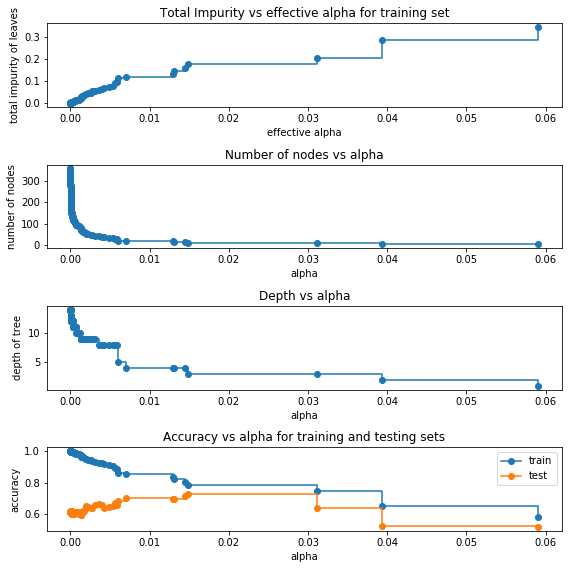

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = tree.DecisionTreeRegressor(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots(4,figsize=(8,8))
ax[0].plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax[0].set_xlabel("effective alpha")
ax[0].set_ylabel("total impurity of leaves")
ax[0].set_title("Total Impurity vs effective alpha for training set")
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
ax[1].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("number of nodes")
ax[1].set_title("Number of nodes vs alpha")
ax[2].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[2].set_xlabel("alpha")
ax[2].set_ylabel("depth of tree")
ax[2].set_title("Depth vs alpha")
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

ax[3].set_xlabel("alpha")
ax[3].set_ylabel("accuracy")
ax[3].set_title("Accuracy vs alpha for training and testing sets")
ax[3].plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax[3].plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax[3].legend()
plt.tight_layout()

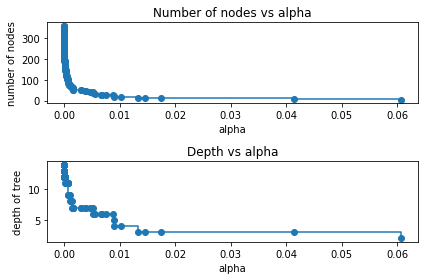

In [114]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

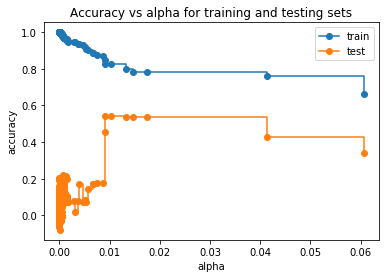

In [115]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

## Classification Trees


Q: Can we use the same algorithm?

Q1: What might go wrong?  Hint: RSS for classification?

Q2: What else can we use for classification?

### Classification Error Rate

<img src= "img_murat/classification_error_rate.png" style="height:100px">

### Gini Index

<img src= "img_murat/gini.png" style="height:100px">

### Shannon's Entropy

<img src= "img_murat/entropy.png" style="height:100px">

### Comparison of different impurity costs:

<img src= "img_murat/gini_classification_entropy.png" style="height:400px">


## Advantages of Tree Methods

[Sklearn Documentation](https://scikit-learn.org/stable/modules/tree.html)

<img src= "img_murat/advantages_of_trees.png" style="height:400px">

## Disadvantages of Tree Methods

<img src= "img_murat/disadvantages_of_trees.png" style="height:200px">


## Further Reading

Q: what is information gain criteria? 

[Watch this video](https://www.youtube.com/watch?v=LDRbO9a6XPU)

Q: What is ID3, C4.5 and CART?

[sklearn documentation 1.10.6](https://scikit-learn.org/stable/modules/tree.html)

Q: What are the tricky things that we should watch out in application?

[sklearn documentation 1.10.5 - Tips on Practical Use](https://scikit-learn.org/stable/modules/tree.html)

Q: Can sklearn plot the structure of a decision tree?

[Check this blog? I didn't fully read this though](https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176)

More readings:

[ISLR - Chapter 8](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)

[A 61 page chapter from a book. - Looks friendly :)](https://www-users.cs.umn.edu/~kumar001/dmbook/ch4.pdf)

[What is the difference btwn 'mse' vs 'friedman_mse'](https://projecteuclid.org/euclid.aos/1013203451)

[Categorical Variables with sklearn-trees](https://stackoverflow.com/questions/24715230/can-sklearn-random-forest-directly-handle-categorical-features)